In [2]:
#AUTHORS: Nithin Prasad, Murtadha Nisyif, Arpit Vaghela

### Class and Library Imports [FUNCTIONAL]
import sklearn #Scikit Learn

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import read_csv
from pandas import DataFrame

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, classification_report
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SequentialFeatureSelector

from imblearn.over_sampling import SMOTE

import random

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [6]:
### Data Exploration with the 28x28 image csv [FUNCTIONAL]

print("Hello")
project_df = pd.read_csv('data/hmnist_28_28_L.csv')
print(project_df.head(n=4))
print(project_df.info())

Hello
   pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        169        171        170        177        181        182   
1         19         57        105        140        149        148   
2        155        163        161        167        167        172   
3         25         71        116        139        136        153   

   pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  \
0        181        185        194        192        188        190   
1        144        155        170        170        182        183   
2        155        152        165        175        175        164   
3        148        161        172        162        159        176   

   pixel0012  pixel0013  pixel0014  pixel0015  pixel0016  pixel0017  \
0        185        181        188        189        182        180   
1        180        179        180        179        180        173   
2        170        171        158        143        144        136  

In [7]:
### Check Dataset Balance [FUNCTIONAL]
pixel_features = []
for i in range(784):
    str_i = str(i)
    len_suffix = len(str_i)
    pixel_feature = "pixel" + "0"*(4-len_suffix) + str_i
    #print(pixel_name)
    pixel_features.append(pixel_feature)

#X = project_df.drop('label', axis = 1)
Y = project_df['label']

#Double check the number of Labels in set
def check_set_balance(inp_set):
    val_counts = inp_set.value_counts()
    total_labels = 0
    #print(type(val_counts))
    for i in range(7):
        num_i = val_counts[i]
        print("Number of labels of class",i,":",num_i)
        total_labels += num_i
        
    print("Total number of labels:",total_labels)

print('----- LABEL CHECK -----')
check_set_balance(Y)

----- LABEL CHECK -----
Number of labels of class 0 : 327
Number of labels of class 1 : 514
Number of labels of class 2 : 1099
Number of labels of class 3 : 115
Number of labels of class 4 : 6705
Number of labels of class 5 : 142
Number of labels of class 6 : 1113
Total number of labels: 10015


785
<class 'list'>
[20, 24, 76, 131, 156, 169, 175, 185, 194, 190, 191, 190, 192, 186, 187, 188, 189, 184, 185, 180, 173, 136, 98, 59, 53, 56, 44, 30, 16, 49, 110, 156, 171, 168, 177, 189, 195, 197, 196, 194, 184, 189, 186, 187, 185, 181, 183, 193, 192, 166, 135, 83, 48, 55, 49, 34, 25, 87, 142, 175, 183, 173, 178, 191, 197, 205, 195, 175, 166, 168, 184, 178, 181, 184, 183, 195, 191, 183, 160, 112, 56, 47, 51, 39, 47, 116, 161, 184, 190, 185, 195, 190, 181, 197, 179, 167, 166, 163, 171, 170, 169, 170, 181, 192, 188, 187, 165, 136, 80, 44, 49, 42, 83, 138, 174, 188, 196, 190, 194, 178, 169, 171, 171, 175, 167, 165, 163, 164, 155, 161, 176, 186, 190, 178, 171, 154, 110, 51, 44, 44, 113, 157, 179, 191, 192, 197, 187, 168, 176, 176, 176, 179, 172, 161, 163, 163, 159, 162, 176, 179, 185, 178, 177, 175, 136, 69, 38, 43, 134, 165, 180, 187, 197, 191, 188, 170, 175, 176, 174, 180, 183, 167, 166, 175, 167, 164, 179, 185, 182, 189, 196, 189, 153, 86, 37, 39, 148, 171, 178, 190, 202, 197, 194, 17

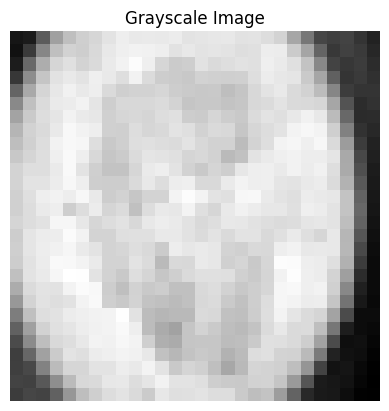

In [8]:
### Get and Display a sample row of the data [DEMO]
project_df.loc[project_df['label'] == 0]
sample_image_vec = list(project_df.iloc[9687])
print(len(sample_image_vec))
print(type(sample_image_vec))
print(sample_image_vec)
sample_image_vec.pop(-1)
print(sample_image_vec)
sample_image_vec = np.array(sample_image_vec)
sample_image = np.reshape(sample_image_vec,(28,28))
#print(sample_image)
plt.imshow(sample_image,cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [10]:
### Employ a pseudo-balancing of the data.
### Uses all of Class 3 (115 images), Class 5 (142 images) and only 327 random images from classes [0,1,2,4,6].

row_indices = []

for label_i in range(7):
    # Find all the rows of the dataframe corresponding to label i
    rows_of_i = project_df.loc[project_df['label'] == label_i]
    indices_of_i = list(rows_of_i.index)
    indices_of_i_random = random.sample(indices_of_i,min(150,len(rows_of_i)))

    row_indices.extend(indices_of_i_random)

row_indices.sort()

print(len(row_indices)) #Should print 1892.

working_df = project_df.iloc[row_indices]
print(working_df.info())
print(working_df.head(n=5))

### save the working df as a csv file
# working_df.to_csv("./data/skin_cancer_dataset.csv", index=False)

1007
<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 0 to 10011
Columns: 785 entries, pixel0000 to label
dtypes: int64(785)
memory usage: 6.0 MB
None
    pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0         169        171        170        177        181        182   
11        137        144        149        145        149        149   
12         26         80        125        135        140        148   
18        142        150        164        164        175        179   
24          2         19         67        104        113        117   

    pixel0006  pixel0007  pixel0008  pixel0009  pixel0010  pixel0011  \
0         181        185        194        192        188        190   
11        158        152        155        162        161        166   
12        150        148        147        149        155        160   
18        183        196        194        187        182        192   
24        124        126        128        133

In [3]:
### Do Train-Validation-Test Split on the Data (eg. 60/20/20)

#read csv
df = pd.read_csv('./data/skin_cancer_dataset.csv')

#separate the features and labels
X = df.drop(columns=['label'])
y = df['label']

#split 60-40 for training dataset and a temp dataset that will be split to 50-50
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split of the temporary set: 50% for validation and 50% for test set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#sanity check
sizes = (len(X_train), len(X_val), len(X_test))
sizes

(1135, 378, 379)

In [4]:
### Apply PCA (fit the PCA matrix using ONLY the training portion of the dataset). Transform each separately
from sklearn.decomposition import PCA

# fit pca on the training set only
pca = PCA(n_components=0.90, random_state=42)
X_train_pca = pca.fit_transform(X_train)

#sanity check
X_train_pca.shape

X_test_pca = pca.transform(X_test)

X_val_pca = pca.transform(X_val)


In [6]:
### Implement MLP
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier()

hyperparameters = mlp_clf.get_params()

# Print hyperparameters
print("MLPClassifier Hyperparameters:")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

mlp_clf.fit(X_train_pca, y_train)


MLPClassifier Hyperparameters:
activation: relu
alpha: 0.0001
batch_size: auto
beta_1: 0.9
beta_2: 0.999
early_stopping: False
epsilon: 1e-08
hidden_layer_sizes: (100,)
learning_rate: constant
learning_rate_init: 0.001
max_fun: 15000
max_iter: 200
momentum: 0.9
n_iter_no_change: 10
nesterovs_momentum: True
power_t: 0.5
random_state: None
shuffle: True
solver: adam
tol: 0.0001
validation_fraction: 0.1
verbose: False
warm_start: False


D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [7]:
### Execute MLP Model and Print Metrics
y_test_pred = mlp_clf.predict(X_test_pca)


In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score:", f1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

# # Generate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MLP Classifier')
# roc_display.plot()
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.show()

# Generate classification report
class_report = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.28232189973614774
F1 Score: 0.27895483174817415
Confusion Matrix:
[[22 13 14  1  3  3  3]
 [13 15 13  6  6  4  8]
 [ 8 10 18  1 20  2  8]
 [ 4  6  6  4  6  2  1]
 [ 7  7 11  4 28 10  5]
 [ 1  2  6  2  6  7  1]
 [10  7 12  1 15  4 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.37      0.35        59
           1       0.25      0.23      0.24        65
           2       0.23      0.27      0.24        67
           3       0.21      0.14      0.17        29
           4       0.33      0.39      0.36        72
           5       0.22      0.28      0.25        25
           6       0.33      0.21      0.26        62

    accuracy                           0.28       379
   macro avg       0.27      0.27      0.27       379
weighted avg       0.28      0.28      0.28       379



In [9]:
# Hyper Parameter tuning
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu', 'leaky_relu', 'elu', 'softplus', 'swish'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 1500, 2000, 2500, 3000]
}

grid_search = GridSearchCV(mlp_clf, param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_val_pca, y_val)

print("Best parameters found:")
print(grid_search.best_params_)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optim

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [0.28578947 0.29052632 0.32554386 0.27778947 0.30431579 0.33049123
 0.34115789 0.28547368 0.34115789 0.3597193  0.2594386  0.28835088
 0.25122807 0.29635088 0.30147368 0.28038596 0.3385614  0.2937193
 0.33063158 0.31214035 0.2934386  0.28568421 0.30698246 0.30687719
 0.26975439 0.3414386  0.29378947 0.32533333 0.32014035 0.28298246
 0.2854386  0.29375439 0.30410526 0.27252632 0.29364912 0.30694737
 0.28831579 0.2962807  0.31996491 0.30701754 0.27238596 0.28315789
 0.2962807  0.2857193  0.30129825 0.30157895 0.32266667 0.2962807
 0.29129825 0.34129825 0.28838596 0.29884211 0.3017193  0.25649123
 0.26712281 0.30677193 0.27487719 0.26196491 0.33052632 0.33301754
 0.28326316 0.25392982 0.28835088 0.27249123 0.29659649 0.28045614
 0.27768421 0.26996491 0.27515789 0.24312281 0.28568421 0.29357895
 0.29094737 0.26189474 0.30140351 0.28838596 0.27484211 0.29638596
 

Best parameters found:
{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 3000}


In [17]:
# Best parameters found:
# {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'max_iter': 200}

# Create MLPClassifier with increased max_iter
best_mlp_clf = MLPClassifier(activation='logistic', alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=1500)

# Train the model
best_mlp_clf.fit(X_train_pca, y_train)

# Evaluate performance on test set
test_accuracy = best_mlp_clf.score(X_test_pca, y_test)
print("Test Accuracy with best parameters:", test_accuracy)



Test Accuracy with best parameters: 0.3087071240105541
